DATASET: https://www.kaggle.com/datasets/erdemtaha/cancer-data

# BUSSINES UNDERSTANDING

570 sel kanker dan 30 fitur untuk menentukan apakah sel kanker dalam data kami jinak atau ganas

Data kanker kami berisi 2 jenis kanker: 1. kanker jinak (B) dan 2. kanker ganas (M).

In [113]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Dataset

In [114]:
df = pd.read_csv('Cancer_Data.csv')

# DATA UNDERSTANDING

diagnosis : Tipe Kanker (B = Terkena Kanker dan M = Tidak Terkena Kanker)

radius_mean : Radius karakteristik visual kanker

texture_mean : Tekstur karakteristik visual kanker

perimeter_mean : Keliling karakteristik visual kanker

area_mean : Luas karakteristik visual kanker

smoothness_mean : Kelembutan karakteristik visual kanker

compactness_mean : Kepadatan karakteristik visual kanker

In [115]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [116]:
df.shape

(569, 33)

In [117]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [118]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# DATA PREPARATION

In [119]:
df.replace(('M', 'B'), (0,1), inplace=True) #gender

In [120]:
# drop multiple columns
columns_to_drop = ['id','concavity_mean','concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
                   'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
                   'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
                   'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
df = df.drop(columns=columns_to_drop)


In [121]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean'],
      dtype='object')

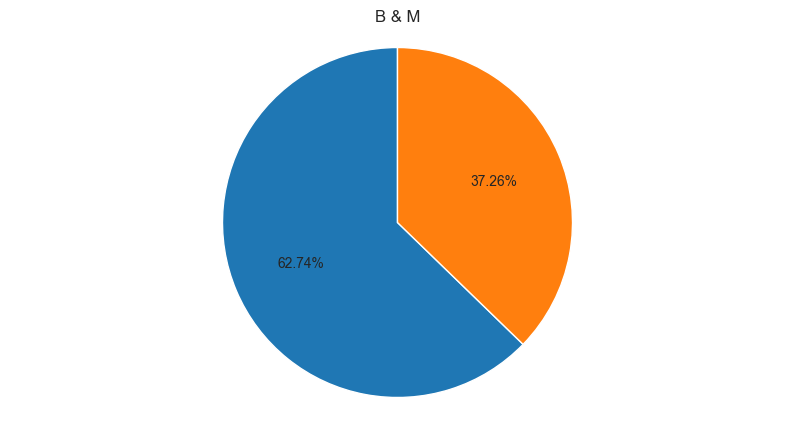

In [122]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.pie(df['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("B & M")
plt.show()

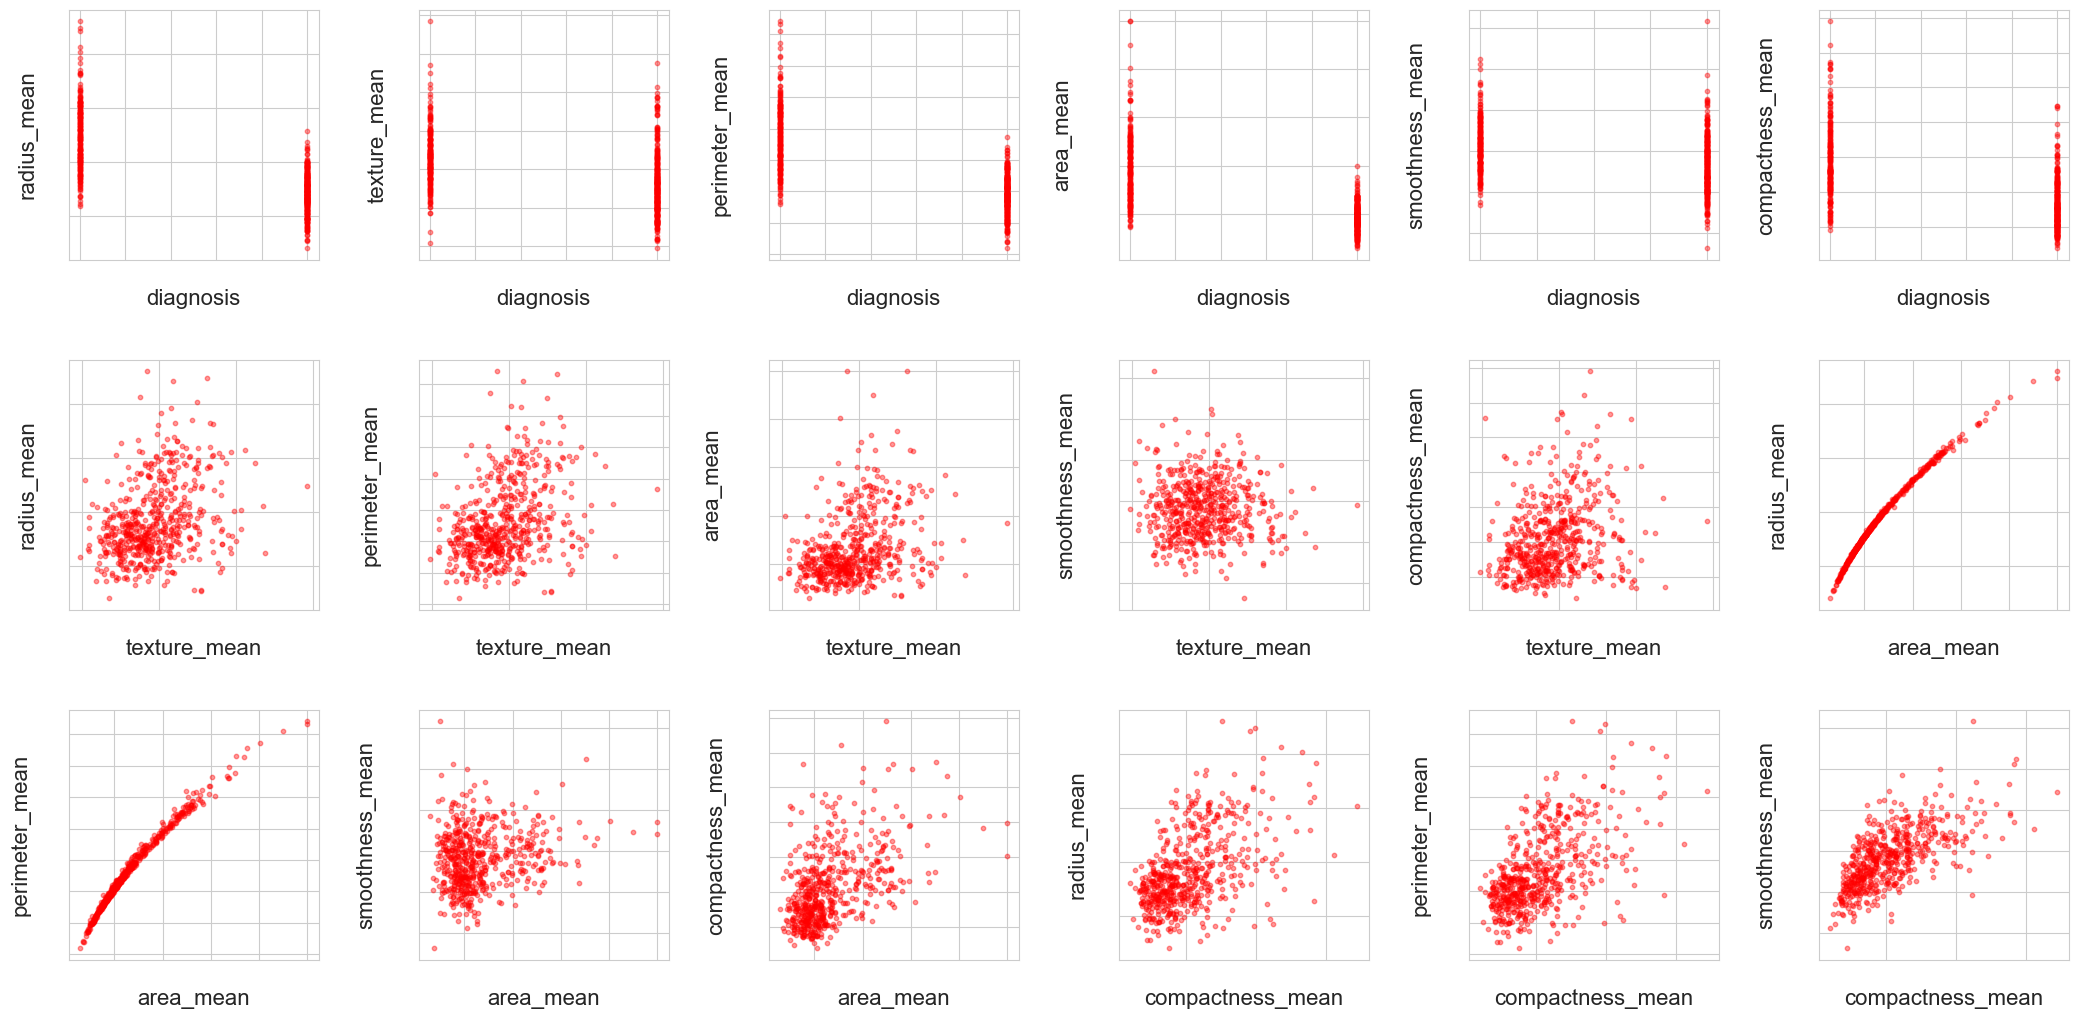

In [123]:
x_ax = 6
y_ax = 6
no = 1
exit = False
cols = list(df.columns)
plt.figure(figsize=(25,25))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
for i,f1 in enumerate(cols):
    if exit:
        break
    temp = cols
    temp.pop(i)
    for j,f2 in enumerate(temp):
        if no > x_ax*y_ax:
            exit = True
            break
        plt.subplot(x_ax,y_ax,no)
        plt.scatter(df[f1],df[f2],s=10,c='red',alpha=0.4)
        plt.xticks(color='w')
        plt.yticks(color='w')
        plt.xlabel(f"{f1}",fontsize=16)
        plt.ylabel(f"{f2}",fontsize=16)
        no = no+1

In [124]:
# memisahkan data dan label
X = df.drop (columns='diagnosis', axis=1)
Y = df['diagnosis']

In [125]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  
0             0.27760  
1             0

In [126]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


3. Standarisasi Data

In [127]:
scaler = StandardScaler()

In [128]:
scaler.fit(X)

StandardScaler()

In [129]:
standarized_data = scaler.transform(X)

In [130]:
print(standarized_data)

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245 -0.48707167]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044  1.05292554]
 ...
 [ 0.70228425  2.0455738   0.67267578  0.57795264 -0.84048388 -0.03867967]
 [ 1.83834103  2.33645719  1.98252415  1.73521799  1.52576706  3.27214378]
 [-1.80840125  1.22179204 -1.81438851 -1.34778924 -3.11208479 -1.15075248]]


In [131]:
X = standarized_data
Y = df['diagnosis']

In [132]:
print(X)
print(Y)

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245 -0.48707167]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044  1.05292554]
 ...
 [ 0.70228425  2.0455738   0.67267578  0.57795264 -0.84048388 -0.03867967]
 [ 1.83834103  2.33645719  1.98252415  1.73521799  1.52576706  3.27214378]
 [-1.80840125  1.22179204 -1.81438851 -1.34778924 -3.11208479 -1.15075248]]
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [134]:
print(X.shape, X_train.shape, X_test.shape)

(569, 6) (455, 6) (114, 6)


5. Membuat data latih menggunakan algoritma SVM

In [135]:
classifier = svm.SVC(kernel='linear')

In [136]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [137]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [138]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.9296703296703297


In [139]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [140]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.9385964912280702


In [141]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280


7. Membuat Model Prediksi

In [142]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776)
# input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print()
print(prediction)
print()
print('1 = Malignant cancer (M) dan 0 = Benign cancer (B)')
print(prediction)
if (prediction[0] == 0):
    print('Pasien tidak terkena kanker')
else :
    print('Pasien terkena kanker')

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467]]

[0]

1 = Malignant cancer (M) dan 0 = Benign cancer (B)
[0]
Pasien tidak terkena kanker


c:\Users\Ghandi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


8. simpan model

In [143]:
import pickle

In [144]:
filename = 'cancer.sav'
pickle.dump(classifier, open(filename,'wb'))
pickle.dump(scaler, open('scaler.sav','wb'))